<a href="https://colab.research.google.com/github/pareeya555/cs352-264-s0716/blob/main/bookRec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
bucket='food352'
data_key = 'books.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)

df=pd.read_csv(data_location,error_bad_lines = False,warn_bad_lines=False)
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11123.000000,11123.000000,1.112300e+04,11123.000000,1.112300e+04,11123.000000
mean,21310.856963,3.934075,9.759880e+12,336.405556,1.794285e+04,542.048099
std,13094.727252,0.350485,4.429758e+11,241.152626,1.124992e+05,2576.619589
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10277.500000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780582e+12,299.000000,7.450000e+02,47.000000
75%,32104.500000,4.140000,9.780872e+12,416.000000,5.000500e+03,238.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000


In [ ]:
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
df.columns=df.columns.str.strip()

In [ ]:
df_cpy=df.copy()

In [ ]:
df_cpy.language_code.unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [ ]:
df_cpy.language_code.replace(to_replace=['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por',
       'srp', 'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur',
       'gla', 'ale'],value=['English','US-English','French','Spanish','British-English','Multiple language','Greek','Middle English','Canada-English',
       'German','japanese','arabic','Dutch','Chinese','Latvian','Portuguese','Serbian','Initial teaching language',
       'russian','Modern Standard Arabic','Galician','Welsh','Swedish','Murik','Turkish','Gaelic','Afro-Asiatic'],inplace=True)

In [ ]:
df_cpy=df_cpy.rename(columns={'language_code':'language'})

In [ ]:
df_cpy.language.unique()

array(['English', 'US-English', 'French', 'Spanish', 'British-English',
       'Multiple language', 'Greek', 'Middle English', 'Canada-English',
       'German', 'japanese', 'arabic', 'Dutch', 'Chinese', 'Latvian',
       'Portuguese', 'Serbian', 'Initial teaching language', 'russian',
       'Modern Standard Arabic', 'Galician', 'Welsh', 'Swedish', 'Murik',
       'Turkish', 'Gaelic', 'Afro-Asiatic'], dtype=object)

In [ ]:
df_cpy['publication_year'] = df_cpy['publication_date'].apply(lambda x: (int)(str(x[-4:])))

In [ ]:
df_cpy

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,English,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,English,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,English,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,English,2690,41428,164,9/13/2004,Scholastic,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,English,512,156,20,12/21/2004,Da Capo Press,2004
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,English,635,783,56,12/1/1988,Penguin Books,1988
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,English,415,820,95,8/1/1993,Penguin Books,1993
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,English,434,769,139,2/27/2007,Ecco,2007


In [ ]:
lang=df_cpy['language'].value_counts().idxmax()
pub=df_cpy['publisher'].value_counts()
print(f'{lang}  has most books written in it.\n{pub.idxmax()}  has the most publications.')

English  has most books written in it.
Vintage  has the most publications.


In [ ]:
auth =df_cpy['authors'].value_counts()[0:10]

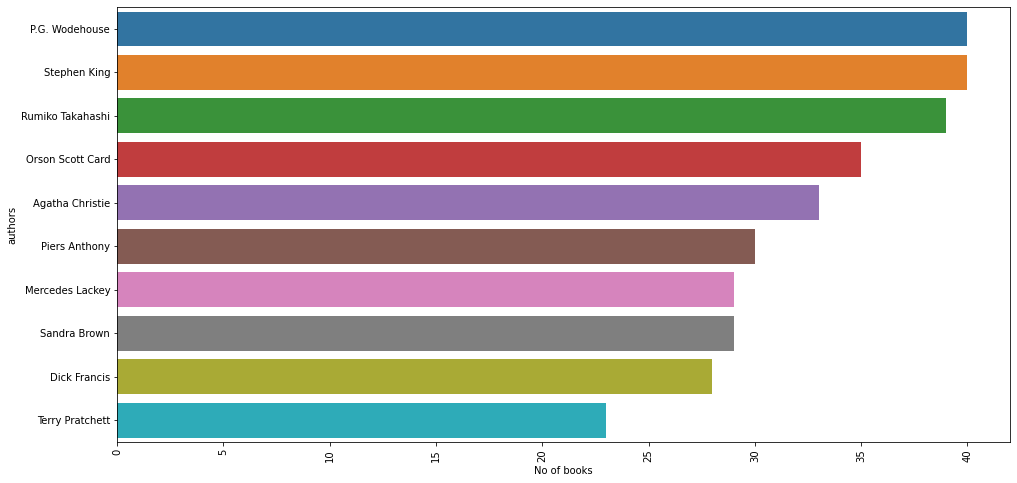

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=auth,y=auth.index)
plt.xticks(rotation=90)
plt.ylabel('authors')
plt.xlabel('No of books')
plt.show()

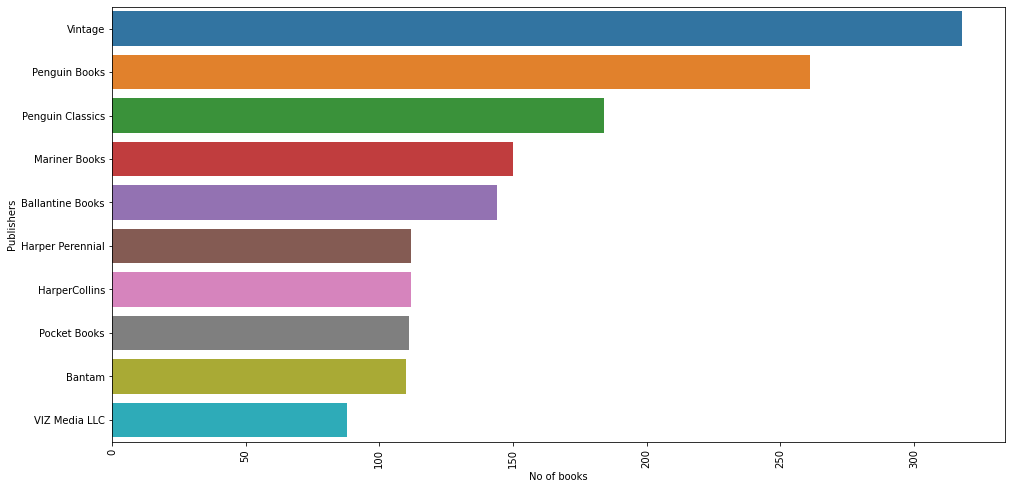

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=pub[0:10],y=pub[0:10].index)
plt.xticks(rotation=90)
plt.ylabel('Publishers')
plt.xlabel('No of books')
plt.show()

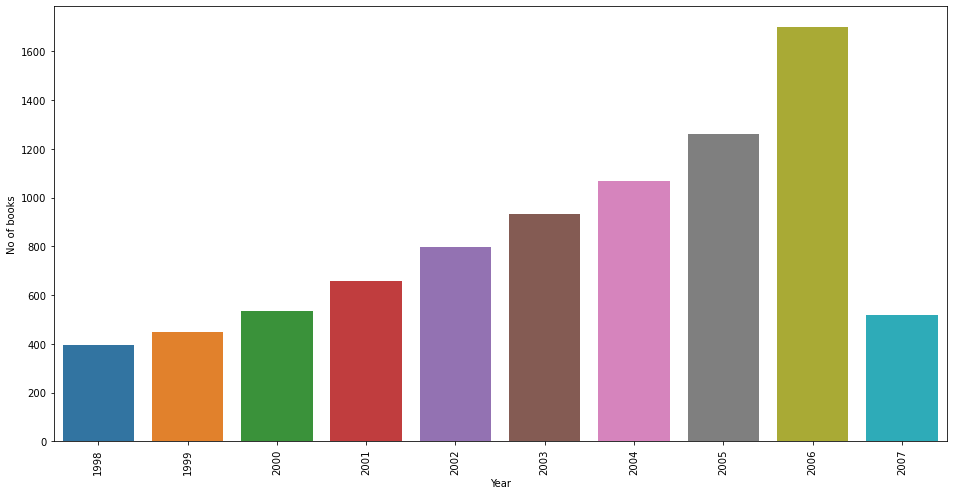

In [ ]:
year=df_cpy['publication_year'].value_counts()[0:10]
plt.figure(figsize=(16,8))
sns.barplot(x=year.index,y=year)
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('No of books')
plt.show()

In [ ]:
sorted_lang=df_cpy['language'].value_counts()[0:10]
print(sorted_lang)

English              8908
US-English           1408
Spanish               218
British-English       214
French                144
German                 99
japanese               46
Multiple language      19
Chinese                14
Greek                  11
Name: language, dtype: int64


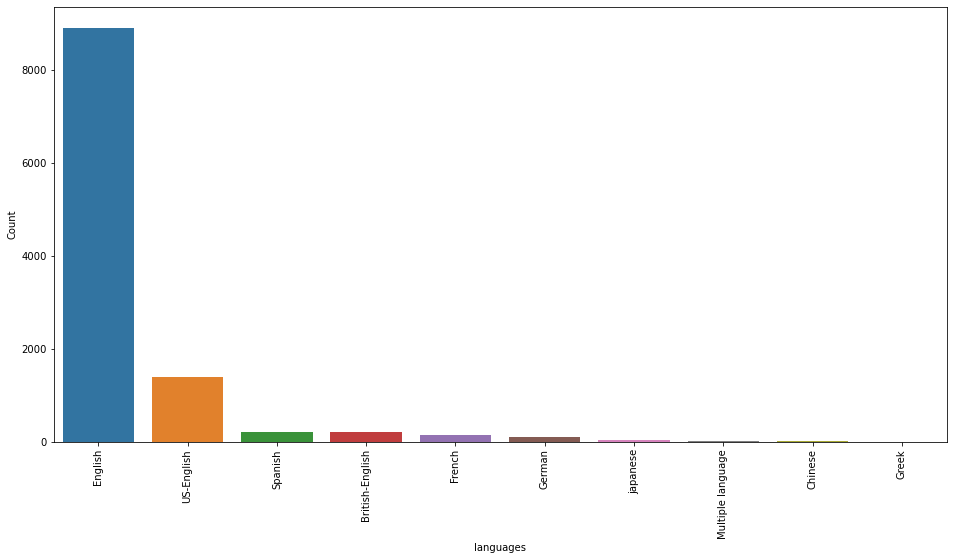

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=sorted_lang.index,y=sorted_lang)
plt.xticks(rotation=90)
plt.xlabel('languages')
plt.ylabel('Count')
plt.show()

In [ ]:
df_cpy.loc[ (df_cpy['average_rating'] >= 0) & (df_cpy['average_rating'] <= 1), 'rating_between'] = "0-1"
df_cpy.loc[ (df_cpy['average_rating'] > 1) & (df_cpy['average_rating'] <= 2), 'rating_between'] = "1-2"
df_cpy.loc[ (df_cpy['average_rating'] > 2) & (df_cpy['average_rating'] <= 3), 'rating_between'] = "2-3"
df_cpy.loc[ (df_cpy['average_rating'] > 3) & (df_cpy['average_rating'] <= 4), 'rating_between'] = "3-4"
df_cpy.loc[ (df_cpy['average_rating'] > 4) & (df_cpy['average_rating'] <= 5), 'rating_between'] = "4-5"

In [ ]:
df_cpy.head()

,bookID,title,authors,average_rating,isbn,isbn13,language,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year,rating_between
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,English,652,2095690,27591,9/16/2006,Scholastic Inc.,2006,4-5
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,English,870,2153167,29221,9/1/2004,Scholastic Inc.,2004,4-5
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,English,352,6333,244,11/1/2003,Scholastic,2003,4-5
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,English,435,2339585,36325,5/1/2004,Scholastic Inc.,2004,4-5
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,English,2690,41428,164,9/13/2004,Scholastic,2004,4-5


In [ ]:
rating_df = pd.get_dummies(df_cpy['rating_between'])
rating_df.head(10)

,0-1,1-2,2-3,3-4,4-5
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
5,0,0,0,1,0
6,0,0,0,0,1
7,0,0,0,0,1
8,0,0,0,0,1
9,0,0,0,0,1


In [ ]:
language_df = pd.get_dummies(df_cpy['language'])
language_df.head()

,Afro-Asiatic,British-English,Canada-English,Chinese,Dutch,English,French,Gaelic,Galician,German,...,Portuguese,Serbian,Spanish,Swedish,Turkish,US-English,Welsh,arabic,japanese,russian
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = pd.concat([rating_df, language_df, df_cpy['average_rating'], df_cpy['ratings_count']], axis=1)
features.head()

,0-1,1-2,2-3,3-4,4-5,Afro-Asiatic,British-English,Canada-English,Chinese,Dutch,...,Spanish,Swedish,Turkish,US-English,Welsh,arabic,japanese,russian,average_rating,ratings_count
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.57,2095690
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.49,2153167
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.42,6333
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.56,2339585
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.78,41428


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors

In [ ]:
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [ ]:
model = neighbors.NearestNeighbors(n_neighbors=10, algorithm='auto')
model.fit(features)
dist, idlist = model.kneighbors(features)

In [ ]:
def Recommender(name):
    book_list = []
    book_id = df_cpy[df_cpy['title'] == name].index
    book_id = book_id[0]
    for newid in idlist[book_id]:
        book_list.append(df_cpy.loc[newid].title)
    print("Recommended books are:")
    for i in range(0,len(book_list)):
      print(f"{i+1}){book_list[i]}")

In [ ]:
def author_Recommender(author):
    auth_list = []
    books=[]
    auth_id = df_cpy[df_cpy['authors'] == author].index
    auth_id = auth_id[0]
    for newid in idlist[auth_id]:
        auth_list.append(df_cpy.loc[newid].authors)
        books.append(df_cpy.loc[newid].title)
    for i in range(0,len(auth_list)):
      print(f"{i+1})Author:{auth_list[i]},\nrecommended book:{books[i]}")

In [ ]:
Recommender("Alien")

Recommended books are:
1)Alien
2)Fables  Vol. 7: Arabian Nights (and Days)
3)Prayers for Rain (Kenzie & Gennaro  #5)
4)Cities of the Plain (The Border Trilogy  #3)
5)True Evil
6)Five on a Treasure Island (Famous Five  #1)
7)Confederates in the Attic: Dispatches from the Unfinished Civil War
8)The Drama of the Gifted Child: The Search for the True Self
9)One Step Behind  (Kurt Wallander  #7)
10)Carter Beats the Devil


In [ ]:
author_Recommender('Stephen King')

1)Author:Stephen King,
recommended book:The Drawing of the Three (The Dark Tower  #2)
2)Author:Neil Gaiman/Sam Kieth/Mike Dringenberg/Malcolm Jones III/Todd Klein/Karen  Berger,
recommended book:Preludes & Nocturnes (The Sandman  #1)
3)Author:Pat Conroy,
recommended book:The Prince of Tides
4)Author:Kahlil Gibran/جبران خليل جبران/Jihad El,
recommended book:The Prophet
5)Author:Robert Jordan,
recommended book:The Dragon Reborn (The Wheel of Time  #3)
6)Author:Robert Jordan,
recommended book:The Shadow Rising (The Wheel of Time  #4)
7)Author:Douglas Adams,
recommended book:Life  the Universe and Everything (Hitchhiker's Guide to the Galaxy  #3)
8)Author:Stephen King/Ned Dameron,
recommended book:The Waste Lands (The Dark Tower  #3)
9)Author:Tite Kubo,
recommended book:Bleach  Volume 01
10)Author:Marjane Satrapi/Mattias Ripa,
recommended book:Persepolis: The Story of a Childhood (Persepolis  #1)
